<a href="https://colab.research.google.com/github/RicksonMonteiroENCAUT/CreditRiskAnalysis/blob/main/An%C3%A1lise_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito


A análise de risco de crédito tem como interesse apresentar a probabilidade de um cliente se tornar inadimplente. 

Afim de evitar prejuízos com possíveis clientes inadimplentes, é extremamente importante a empresa realizar uma análise de risco antes de ceder crédito ao cliente.   

<p align=center>
  <img src="https://raw.githubusercontent.com/RicksonMonteiroENCAUT/CreditRiskAnalysis/master/conceito-abstrato-de-programa-de-alivio-de-hipotecas_335657-3059.jpg" height="400px">
</p>
 
 Já existem algumas soluções que buscam analisar informações financeiras dos clientes afim de avaliar a rentabilidade e liquidez do negócio como o *ratio analysis*. No entanto, com o avanço das tecnologias voltadas a *machine learning* as empresas passaram a buscar soluções mais otimizadas. 

Pode-se citar a fintech, [NuBank](https://nubank.com.br/) que vem se destacando pelas soluções de inteligência artifical e times de *data science*.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>

> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos. Assim, evitando a perda de clientes.


## Obtenção dos Dados 

O conjunto de dados utilizado nesse projeto é proviniente de um competição realizada pela própria Nubank, afim de encontrar talentos para possíveis contratações.

Os dados estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0).

In [1]:
!pip install imblearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV


sns.set_style('dark')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df= pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0', delimiter=',')

#Limpeza e reconhecimento dos dados

In [4]:
df.shape

(45000, 43)

Nosso conjunto possui 45000 entradas e 43 features.

In [5]:
#Visualizando as 5 primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [6]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Verificando se havia alguma feature classificada de forma errada encontrei apenas a `aplication_time_aplied` que poderia ser convertido para o formato `datetime` 

In [7]:
df.application_time_applied= pd.to_datetime(df.application_time_applied, errors='coerce')

In [8]:
df.dtypes

ids                                                         object
target_default                                              object
score_1                                                     object
score_2                                                     object
score_3                                                    float64
score_4                                                    float64
score_5                                                    float64
score_6                                                    float64
risk_rate                                                  float64
last_amount_borrowed                                       float64
last_borrowed_in_months                                    float64
credit_limit                                               float64
reason                                                      object
income                                                     float64
facebook_profile                                            ob

A coluna `ids` possui valores alpha numéricos, e aparenta servir apenas como uma identificação do usuário. Dessa forma excluí-la não trazerá problemas e simplificará a análise do dados e interpretação futura do modelo.


In [9]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,NaT,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,2021-05-06 13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [10]:
df.drop(columns=['ids'], axis=1, inplace=True)

In [11]:
df.target_default.value_counts(dropna=False, normalize=True)

False    0.779556
True     0.148022
NaN      0.072422
Name: target_default, dtype: float64

A coluna target_default traz o label se o cliente é um caso de default ou não. Os valores ausentes nessa coluna representam apenas 7,24% do total. Também é possível perceber que o modelo apresenta um desbalanceio nas classes.Dessa forma irei preferir remover os valores afim de evitar enviesar de alguma forma o modelo.

In [12]:
df.dropna(subset=['target_default'], axis=0, inplace=True)

In [13]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

target_fraud                                        0.967490
last_amount_borrowed                                0.661412
last_borrowed_in_months                             0.661412
ok_since                                            0.586114
external_data_provider_credit_checks_last_2_year    0.503821
external_data_provider_credit_checks_last_year      0.335905
credit_limit                                        0.314056
n_issues                                            0.261685
facebook_profile                                    0.099495
marketing_channel                                   0.079251
application_time_applied                            0.069332
job_name                                            0.062696
external_data_provider_email_seen_before            0.049951
lat_lon                                             0.030234
user_agent                                          0.015716
n_bankruptcies                                      0.003234
n_defaulted_loans       

O conjunto possui muitos valores ausentes, alguns são passíveis de tratamento. No entanto, um viés muito alto seria adicionado a algumas colunas caso fosse realizado algum tratamento. A coluna target_fraud possui 96,62% dos valores ausentes. Logo, será removida.

In [14]:
df.drop(['target_fraud'], axis=1,inplace=True)

In [15]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,14133.000000,14133.000000,28632.000000,4.174100e+04,17276.000000,41606.000000,41729.000000,41741.000000,30818.000000,41741.000000,20711.0,41741.000000,27720.000000,39656.000000,41741.000000,41741.0,41741.000000
mean,346.459836,100.006820,0.499416,99.919399,0.294451,13328.104095,40.588410,33877.220453,7.108012e+04,35.192174,0.076696,0.004625,10.639108,11.023882,247.748545,0.0,1.504396,0.504185,12.731188,500.491771,inf,33910.856688
std,110.102271,3.183821,0.288085,10.022703,0.101561,7918.698433,9.437936,36141.985884,5.225978e+04,21.629577,0.274820,0.080157,4.588175,4.596036,146.326172,0.0,1.114207,0.499992,125.711218,287.993121,NaN,12696.432491
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.0,12001.000000
25%,270.000000,97.862546,0.251595,93.182517,0.220000,7210.280000,36.000000,9975.000000,4.401958e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50910.0,22914.000000
50%,340.000000,100.017950,0.500174,99.977774,0.290000,12011.050000,36.000000,25213.000000,6.004409e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,502.000000,101623.0,33877.000000
75%,420.000000,102.143100,0.747630,106.630991,0.360000,18030.160000,36.000000,46492.500000,8.503289e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151248.0,44923.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


O método `describe()` permite visualizar que alguns dados possuem um desvio padrão muito elevado, valores máximos muito distantes da média e mediana, média e mediana distantes entre si. Isso pode ser um forte indicativo da presença de outliers nos dados. Visualizando a distribuição e os boxplots dessas variáveis pode auxiliar a confirmar essa hipótese.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if __name__ == '__main__':


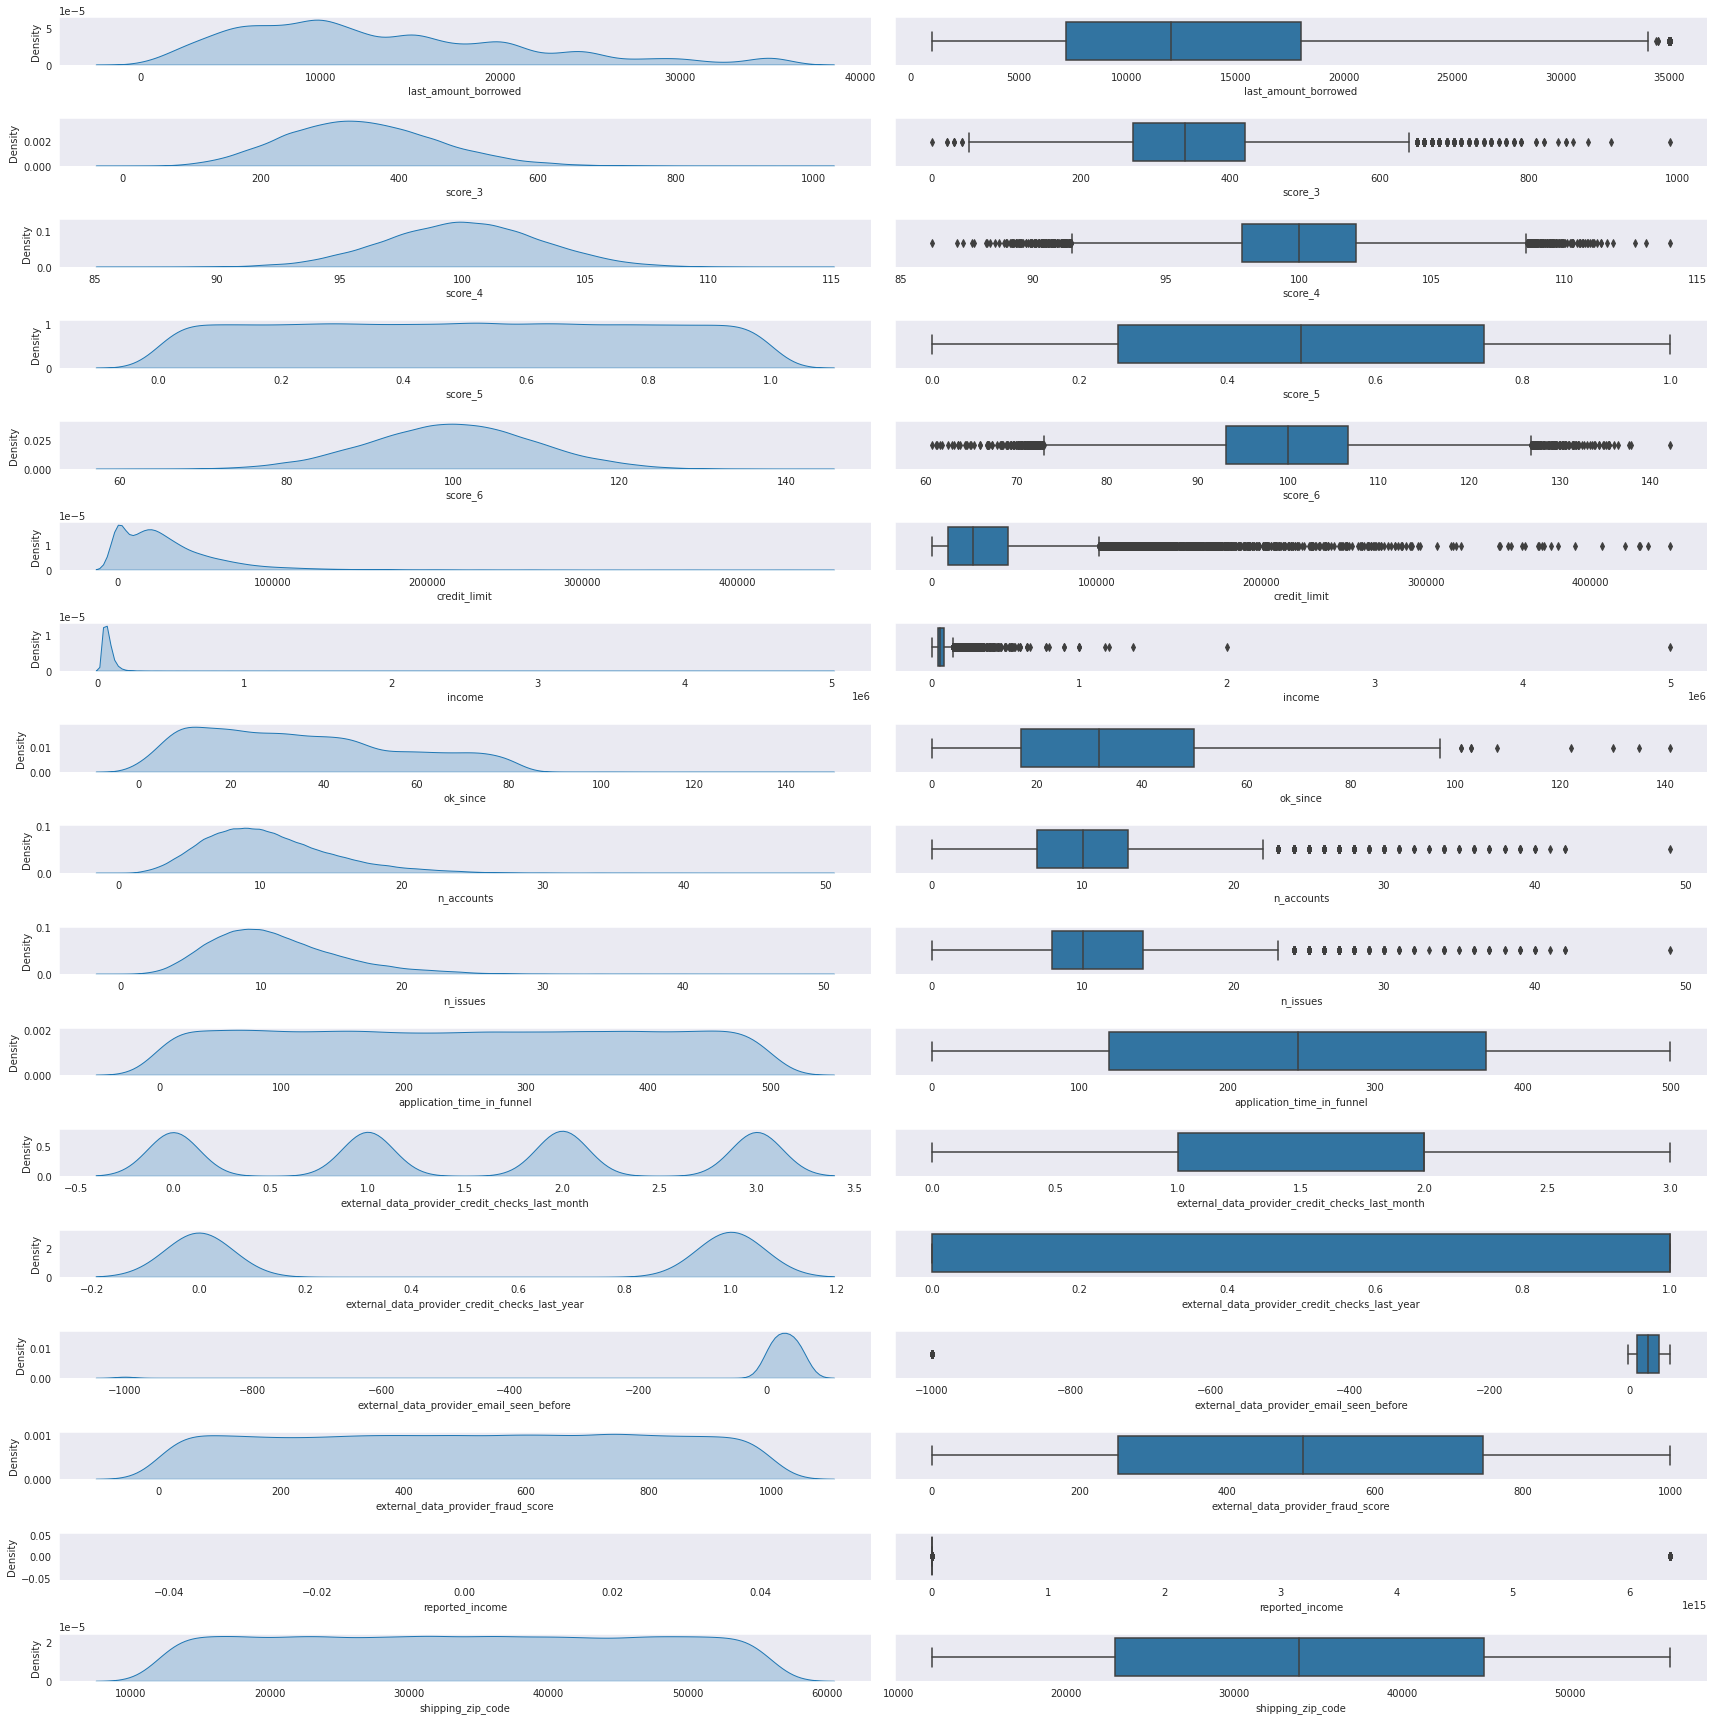

In [16]:
features_n=['last_amount_borrowed', 'score_3','score_4','score_5','score_6', 'credit_limit','income','ok_since','n_accounts','n_issues','application_time_in_funnel', 'external_data_provider_credit_checks_last_month','external_data_provider_credit_checks_last_year','external_data_provider_email_seen_before','external_data_provider_fraud_score','reported_income','shipping_zip_code']
fig, axes= plt.subplots(len(features_n), 2, figsize=(24,24),constrained_layout=True)


for i,f in enumerate(features_n):
  sns.kdeplot(x=f, data=df, ax=axes[i][0], fill=True);
  sns.boxplot(x=f, data=df, ax=axes[i][1]);

fig.tight_layout();

Olhando as distruibuições e os boxplots das variáveis numéricas, é possível visualizar a presença de alguns outliers. Também notar algumas variáveis multimodais. Irei remover os outliers através da regra do IQR score, e substituir os valores ausentes nas variáveis pela mediana de cada conjunto.

In [17]:
def outlier_tratament(serie):
  Q1, Q3= serie.quantile([.25,.75])
  IQR= Q3-Q1
  lower= Q1- (1.5*IQR)
  upper= Q3 +(1.5*IQR)
  return lower, upper 

In [18]:
df_new = df.copy()
for col in features_n:
  lower, upper = outlier_tratament(df[col])
  df_new.drop(df_new[df_new[col]<lower].index, axis=0, inplace=True) 
  df_new.drop(df_new[df_new[col]>upper].index, axis=0, inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


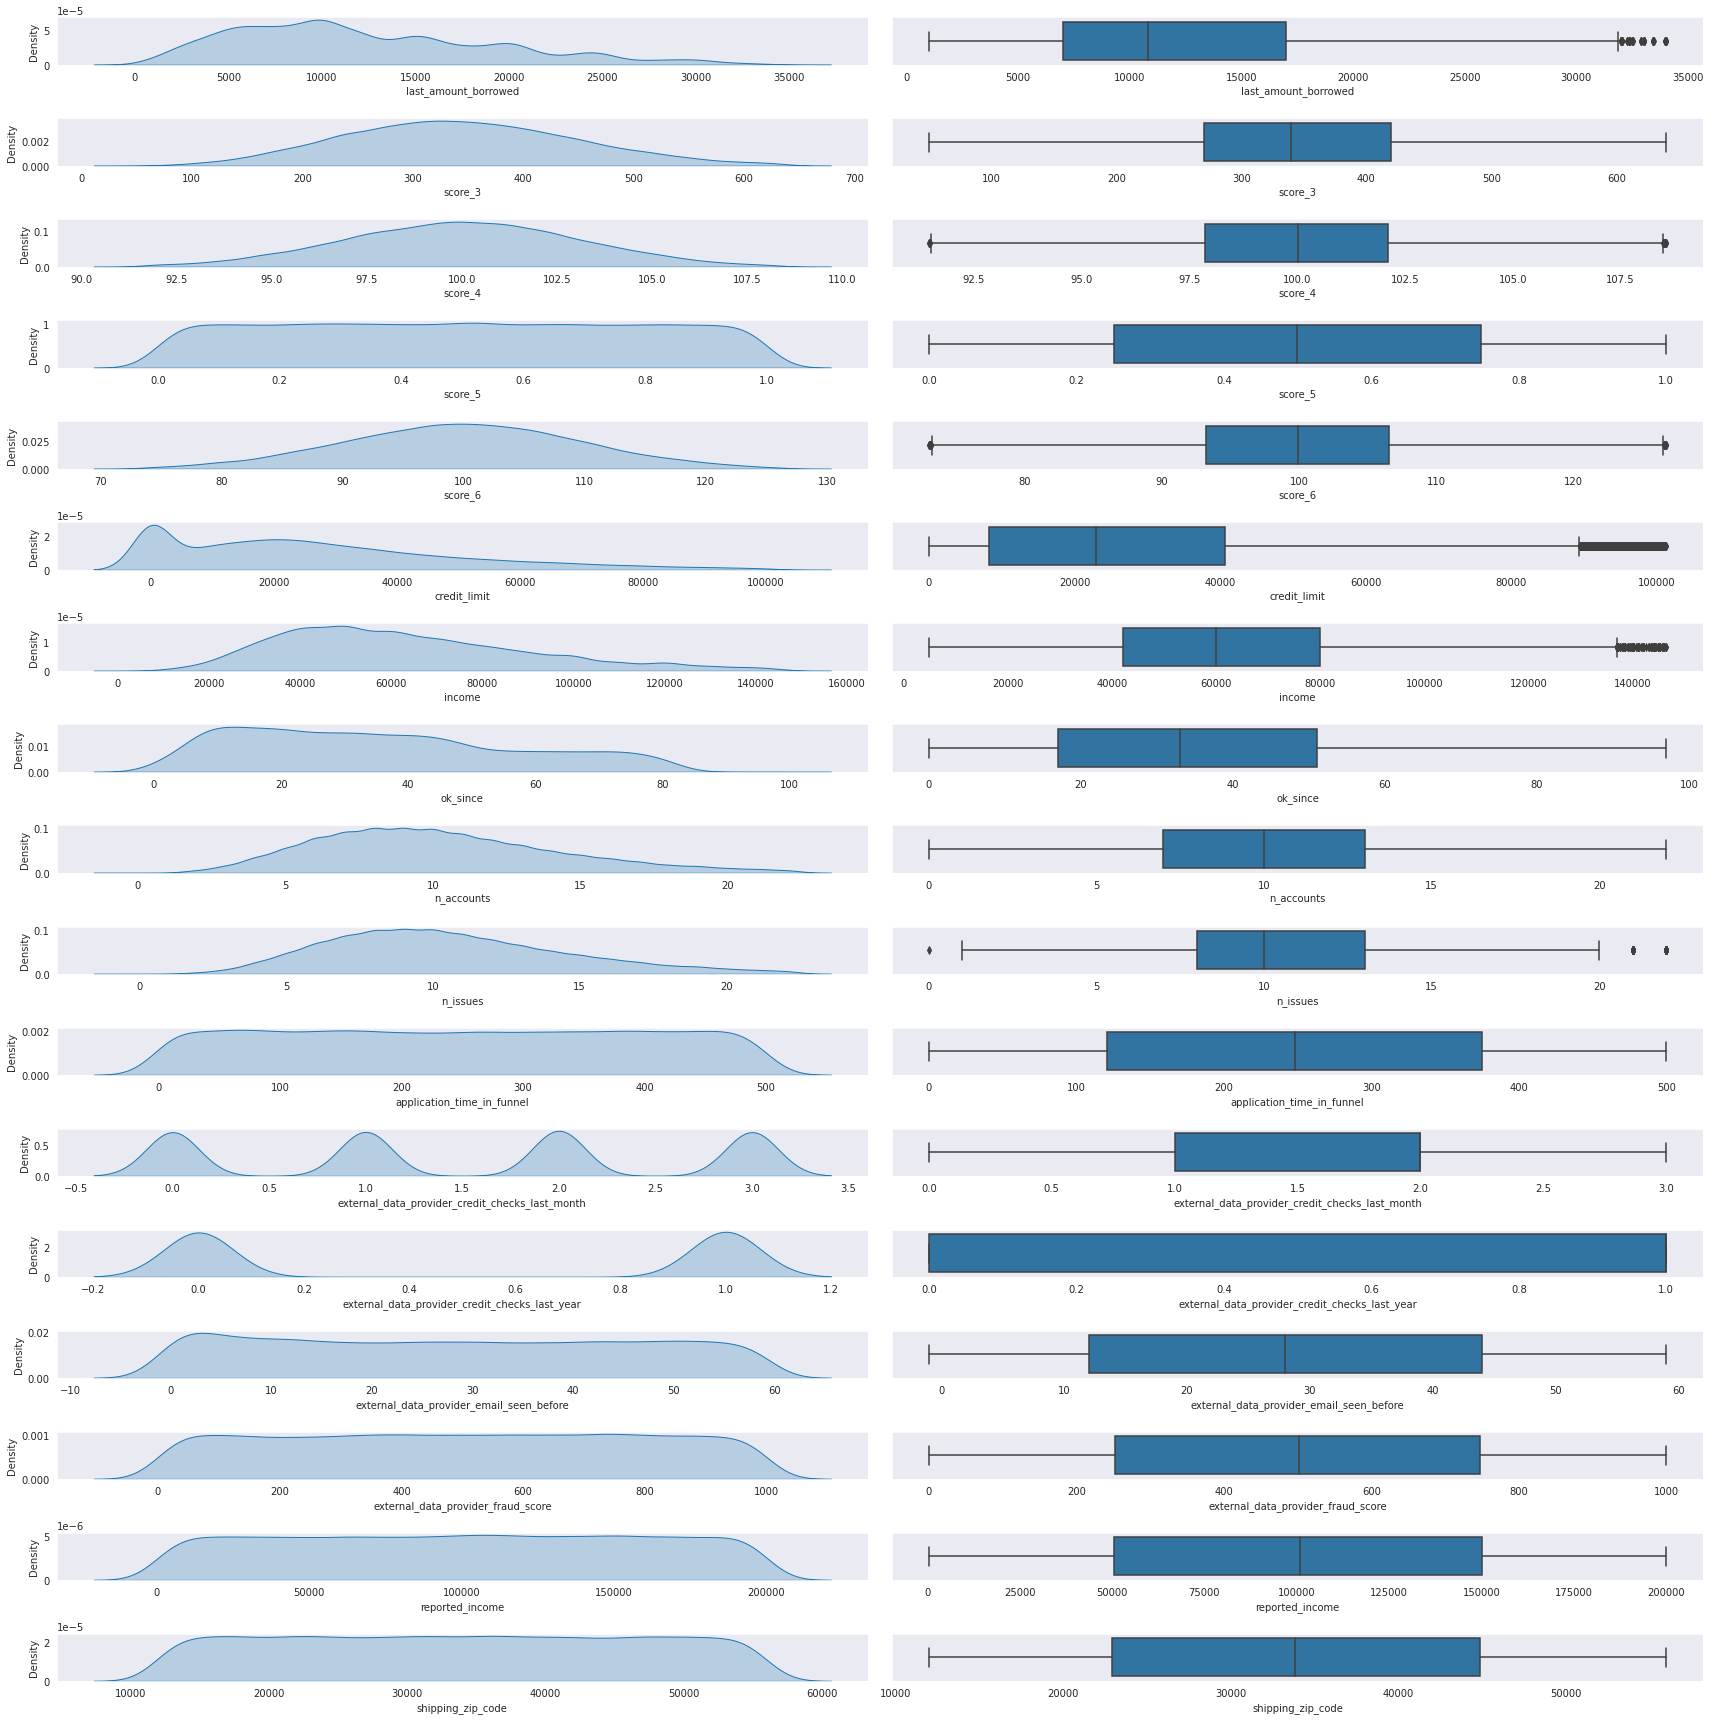

In [19]:
fig, axes= plt.subplots(len(features_n), 2, figsize=(24,24),constrained_layout=True)


for i,f in enumerate(features_n):
  sns.kdeplot(x=f, data=df_new, ax=axes[i][0], fill=True);
  sns.boxplot(x=f, data=df_new, ax=axes[i][1]);

fig.tight_layout();

Visualizando novamente as distruibuições é possível perceber a redução na quantia de outliers. Com os outliers removidos, substituirei os valores ausentes pela mediana de cada feature.

In [20]:
for f in features_n:
  df_new[f].fillna(df_new[f].median(), inplace=True)

In [21]:
df_new.isnull().sum().sort_values(ascending=False)/df_new.shape[0]

last_borrowed_in_months                             0.665987
external_data_provider_credit_checks_last_2_year    0.503390
facebook_profile                                    0.098842
marketing_channel                                   0.079052
application_time_applied                            0.068660
job_name                                            0.062293
lat_lon                                             0.029989
user_agent                                          0.015601
n_bankruptcies                                      0.003280
n_defaulted_loans                                   0.000303
reason                                              0.000110
external_data_provider_first_name                   0.000000
state                                               0.000000
score_1                                             0.000000
score_2                                             0.000000
score_3                                             0.000000
score_4                 

A variável `external_data_provider_credit_checks_last_2_year` possui apenas valores 0 e ausentes. .Será removida essa coluna. Apesar da variável `last_borrowed_in_months` ser numérica, apresenta apenas dois valores, dessa forma irei substituir os valores ausentes pelo valor mais frequente.

In [22]:
df_new.last_borrowed_in_months.value_counts()

36.0    9924
60.0    2194
Name: last_borrowed_in_months, dtype: int64

In [23]:
df_new.external_data_provider_credit_checks_last_2_year.value_counts()

0.0    18017
Name: external_data_provider_credit_checks_last_2_year, dtype: int64

In [24]:
df_new.drop(['external_data_provider_credit_checks_last_2_year'], axis=1, inplace=True)
df_new.last_borrowed_in_months.fillna(36, inplace=True)

In [25]:
df_new.isnull().sum().sort_values(ascending=False)/df_new.shape[0]

facebook_profile                                   0.098842
marketing_channel                                  0.079052
application_time_applied                           0.068660
job_name                                           0.062293
lat_lon                                            0.029989
user_agent                                         0.015601
n_bankruptcies                                     0.003280
n_defaulted_loans                                  0.000303
reason                                             0.000110
score_2                                            0.000000
zip                                                0.000000
state                                              0.000000
score_1                                            0.000000
income                                             0.000000
score_4                                            0.000000
score_3                                            0.000000
credit_limit                            

Visualizando novamente a porcentagem de dados ausentes, vemos alguns casos em variáveis categoricas. Para esses casos irei substituir os valores ausente pelos valores mais frequentes em cada coluna.

In [26]:
df_cat = df_new.select_dtypes('object').columns

In [27]:
imputer= SimpleImputer(strategy='most_frequent').fit(df.loc[:,df_cat])
df_new.loc[:,df_cat]= imputer.transform(df_new.loc[:,df_cat])

In [28]:
df_new.isnull().sum().sort_values(ascending=False)/df_new.shape[0]

application_time_applied                           0.068660
n_bankruptcies                                     0.003280
n_defaulted_loans                                  0.000303
user_agent                                         0.000000
credit_limit                                       0.000000
zip                                                0.000000
state                                              0.000000
facebook_profile                                   0.000000
income                                             0.000000
reason                                             0.000000
last_borrowed_in_months                            0.000000
job_name                                           0.000000
last_amount_borrowed                               0.000000
risk_rate                                          0.000000
score_6                                            0.000000
score_5                                            0.000000
score_4                                 

As variáveis `n_bankruptcies` e `n_defaulted_loans` possuem apenas 5 e 3 valores numéricos diferentes respectivamentes. Dessa forma,será substituido os valores ausentes pelo mais frequente, que por coincidência coincide com a mediana de cada variável. 

In [29]:
print(df_new['n_bankruptcies'].value_counts())
print(20*"-=-")
print(df['application_time_applied'].value_counts())
print(20*"-=-")
print(df_new['n_defaulted_loans'].value_counts())

0.0    33355
1.0     2762
2.0       34
3.0        6
4.0        3
5.0        1
Name: n_bankruptcies, dtype: int64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
2021-05-06 18:02:09    6
2021-05-06 02:29:58    5
2021-05-06 07:29:29    5
2021-05-06 16:17:56    5
2021-05-06 03:47:15    5
                      ..
2021-05-06 12:12:38    1
2021-05-06 02:26:22    1
2021-05-06 12:14:18    1
2021-05-06 06:07:17    1
2021-05-06 21:35:36    1
Name: application_time_applied, Length: 31195, dtype: int64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
0.0    36136
1.0      116
2.0       13
3.0        4
Name: n_defaulted_loans, dtype: int64


In [30]:
df_new['n_bankruptcies'].fillna(df_new['n_bankruptcies'].median(),inplace=True)
df_new['n_defaulted_loans'].fillna(df_new['n_defaulted_loans'].median(),inplace=True)
df_new['application_time_applied'].fillna(pd.to_datetime('2021-05-05 18:02:09'),inplace=True)

In [31]:
for cat in df_cat:
  print(cat)
  print(20*"-=-")
  print(df[cat].value_counts(normalize=True).sort_values(ascending=False))
  print(20*"-=-")

target_default
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
False    0.840421
True     0.159579
Name: target_default, dtype: float64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
score_1
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
DGCQep2AE5QRkNCshIAlFQ==    0.338804
1Rk8w4Ucd5yR3KcqZzLdow==    0.246760
4DLlLW62jReXaqbPaHp1vQ==    0.177499
8k8UDR4Yx0qasAjkGrUZLw==    0.143121
e4NYDor1NOw6XKGE60AWFw==    0.062552
smzX0nxh5QlePvtVf6EAeg==    0.025467
fyrlulOiZ+5hoFqLa6UbDQ==    0.005798
Name: score_1, dtype: float64
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
score_2
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
osCzpM4hJrxugqWWuZmMWw==    0.083036
SaamrHMo23l/3TwXOWgVzw==    0.076783
RO7MTL+j4PH2gNzbhNTq/A==    0.070386
/tdlnWjXoZ3OjdtBXzdOJQ==    0.060013
7h+tk4z7O9brtBSe1rNjxA==    0.054383
Fv28Bz0YRTVAT5kl1bAV6g==    0.054215
rJZgTmANW3PjOCQLCcp4iQ==    0.053904
pAzpxkhjPsjWldgSX21+zg==    0.049064
IOVu8a

A variável `email` possui emails digitados de forma errada necessitando de um pré-processamento.

In [32]:
def formate(email):
  if email == 'gmaill.com':
    return 'gmail.com'
  elif email =='hotmaill.com':
    return 'hotmail.com'
  else:
    return email

In [33]:
df_new['email']=df_new['email'].apply(formate)

In [34]:
df_new['email'].value_counts()

gmail.com      18315
hotmail.com     9110
outlook.com     4688
spgov.com       4167
Name: email, dtype: int64

#Análise explanatória de dados

Visualizar algumas variáveis pode ajudar trazer insights acerca do problema.

In [35]:
df_default=df_new[df_new.target_default==True].copy()

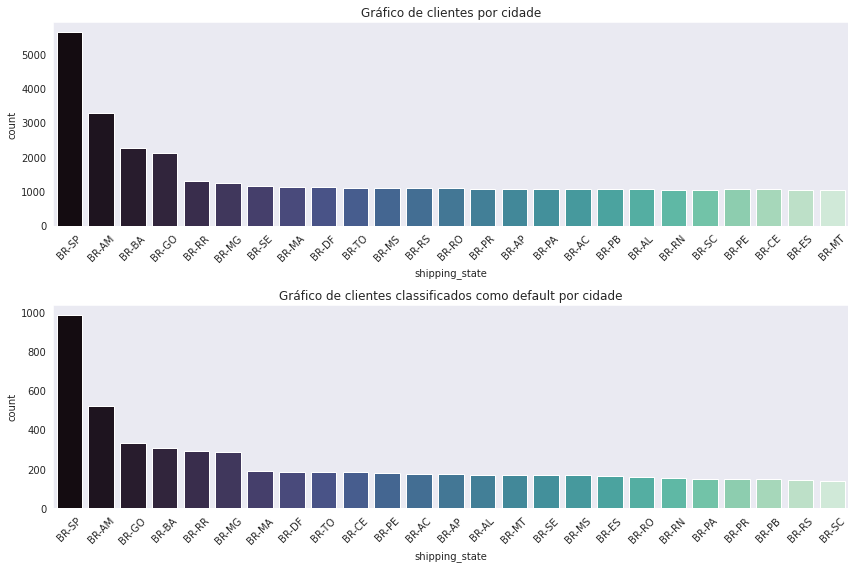

In [36]:
fig, axes = plt.subplots(2,1, figsize=(12,8))
order=df.shipping_state.value_counts().index
order1=df_default.shipping_state.value_counts().index
sns.countplot(x='shipping_state', data=df_new, ax=axes[0], order=order, palette='mako')
sns.countplot(x='shipping_state', data=df_default, ax=axes[1], order=order1, palette='mako')
axes[0].set_title('Gráfico de clientes por cidade')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_title('Gráfico de clientes classificados como default por cidade')

plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9 , top=0.9, wspace=0.2, hspace=0.2)
plt.xticks(rotation=45)
fig.tight_layout()

In [37]:
df_default['shipping_state'].value_counts(normalize=True)

BR-SP    0.167917
BR-AM    0.088646
BR-GO    0.056427
BR-BA    0.051824
BR-RR    0.049267
BR-MG    0.049096
BR-MA    0.031879
BR-DF    0.031197
BR-TO    0.031197
BR-CE    0.031026
BR-PE    0.030856
BR-AC    0.029492
BR-AP    0.029322
BR-AL    0.029151
BR-MT    0.029151
BR-SE    0.028981
BR-MS    0.028810
BR-ES    0.027617
BR-RO    0.027276
BR-RN    0.026423
BR-PA    0.025742
BR-PR    0.025742
BR-PB    0.025230
BR-RS    0.024207
BR-SC    0.023525
Name: shipping_state, dtype: float64

O estado de são paulo é a localidade onde a NuBank mais possui clientes, seguido dos estados do Amazonas e Bahia. Para os estados com mais casos de `default` temos o São Paulo seguido do Amazonas e Goiás. 16,72% dos casos de *default* são localizados no estado de São Paulo, aproximadamente 2 vezes maior que o segundo lugar, Amazonas (8,88%) .

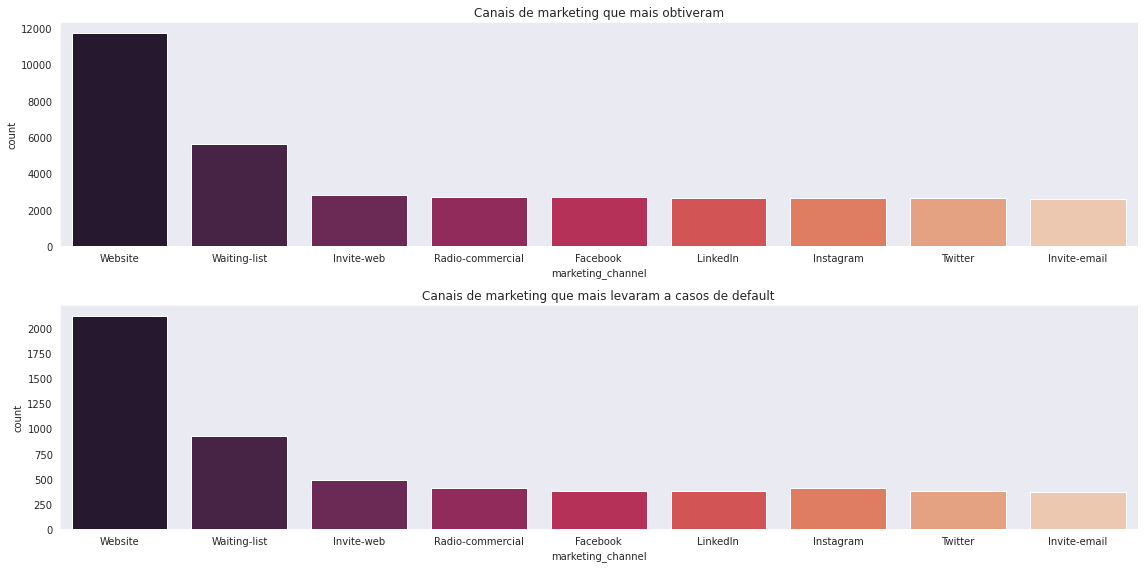

In [38]:
fig, axs= plt.subplots(2,1,figsize=(16,8))

sns.countplot(x='marketing_channel', data=df_new, order= df.marketing_channel.value_counts().index, ax=axs[0], palette='rocket')
sns.countplot(x='marketing_channel', data=df_default, order= df.marketing_channel.value_counts().index, ax=axs[1], palette='rocket')
axs[0].set_title('Canais de marketing que mais obtiveram')
axs[1].set_title('Canais de marketing que mais levaram a casos de default')

plt.tight_layout()

In [39]:
df_default['marketing_channel'].value_counts(normalize=True)

Website             0.362598
Waiting-list        0.158711
Invite-web          0.083703
Radio-commercial    0.068871
Instagram           0.068871
Twitter             0.065121
LinkedIn            0.065121
Facebook            0.063757
Invite-email        0.063246
Name: marketing_channel, dtype: float64

A maior parte dos clientes são obtidos através do Website, seguido pela lista de espera e convites. De mesma forma, maior parte dos clientes classificados como *default* vem do website representando 36,26% dos casos de *default*.

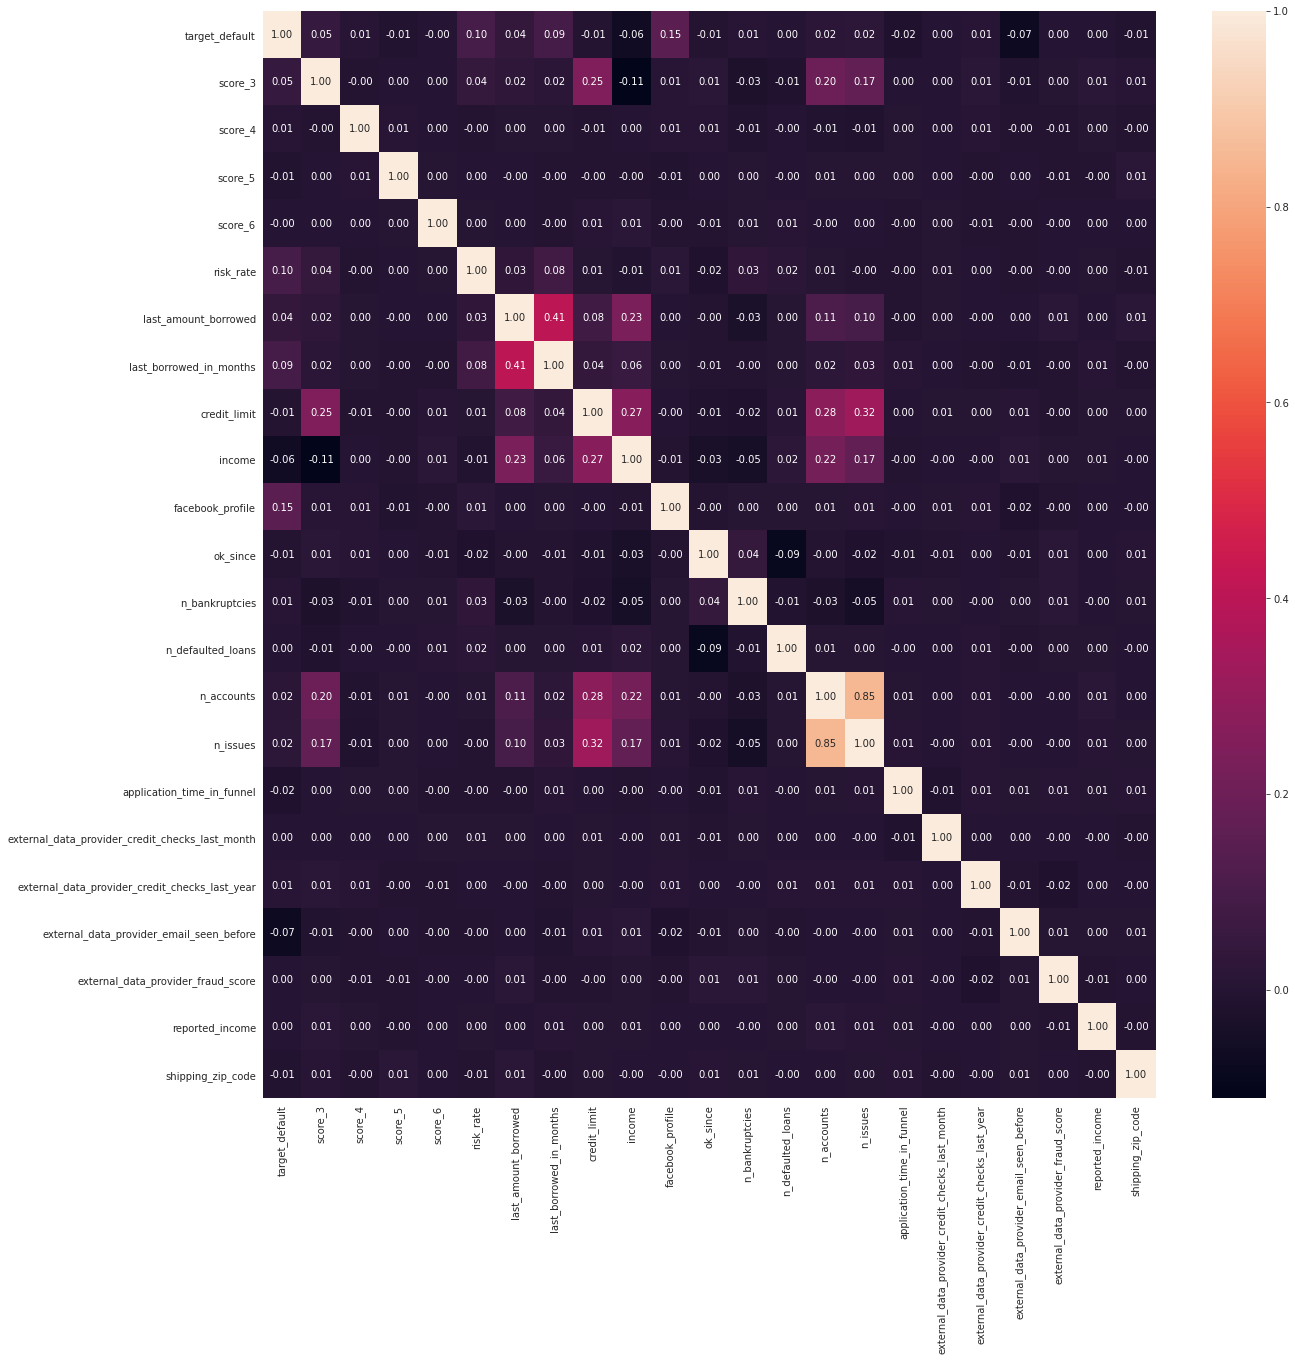

In [40]:
plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f');

A matriz de correlação das variáveis não traz nenhum insight acerca do problema. Apenas as variáveis `n_issues` e `n_accounts` apresentam um correlação forte.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


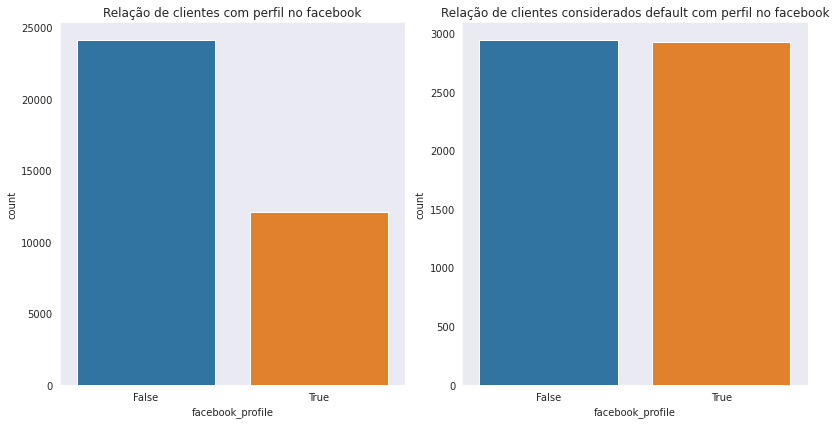

In [41]:
fig, axs= plt.subplots(1,2,figsize=(12,6))
sns.countplot('facebook_profile', data=df_new, order=df.facebook_profile.value_counts().index, ax=axs[0])
axs[0].set_title('Relação de clientes com perfil no facebook')
sns.countplot('facebook_profile', data=df_default, order=df_default.facebook_profile.value_counts().index, ax=axs[1])
axs[1].set_title('Relação de clientes considerados default com perfil no facebook')
plt.tight_layout()

In [42]:
df_new['facebook_profile'].value_counts(normalize=True)

False    0.665987
True     0.334013
Name: facebook_profile, dtype: float64

In [43]:
df_default['facebook_profile'].value_counts(normalize=True)

False    0.502046
True     0.497954
Name: facebook_profile, dtype: float64

66,60% dos clientes do NuBank não possuem perfil no facebook. E dos casos de *default* apenas 49,79% possuem perfil.

In [44]:
df_new.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...


In [45]:
df_new['email'].value_counts()

gmail.com      18315
hotmail.com     9110
outlook.com     4688
spgov.com       4167
Name: email, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


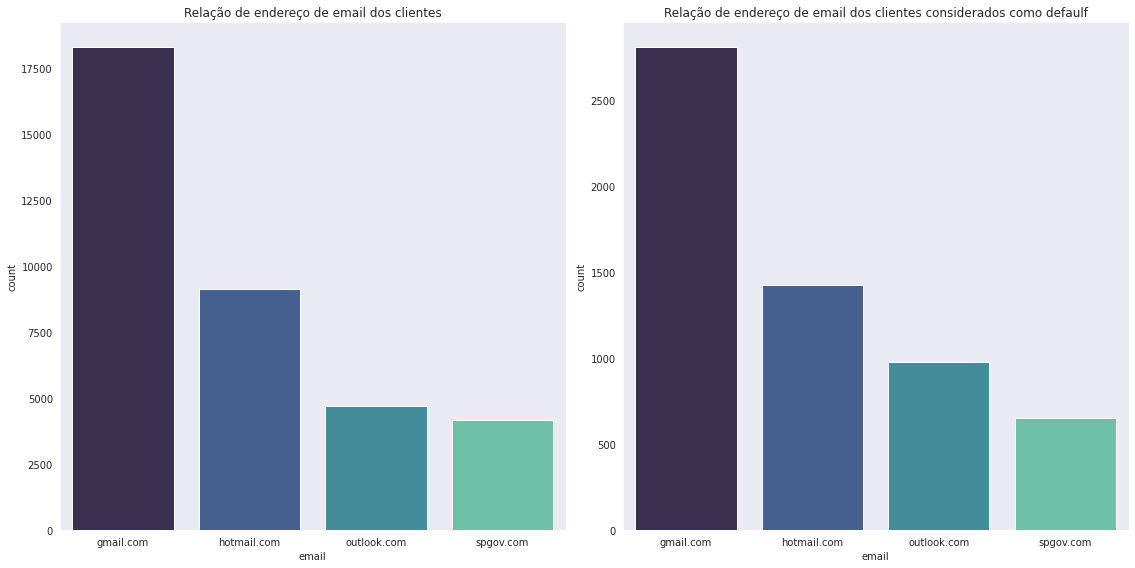

In [46]:
fig, axs= plt.subplots(1,2,figsize=(16,8))
sns.countplot('email', data=df_new, order=df_new.email.value_counts().index, ax=axs[0], palette='mako')
axs[0].set_title('Relação de endereço de email dos clientes')
sns.countplot('email', data=df_default, order=df_default.email.value_counts().index, ax=axs[1], palette='mako')
axs[1].set_title('Relação de endereço de email dos clientes considerados como defaulf')
plt.tight_layout()

In [47]:
df_default['email'].value_counts(normalize=True)

gmail.com      0.479202
hotmail.com    0.242925
outlook.com    0.166723
spgov.com      0.111149
Name: email, dtype: float64

A maior parte dos usuários da nubank possuem endereço do gmail. 47,92% dos casos de default possuem endereço de email do gmail.

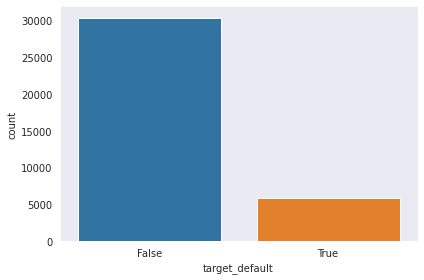

In [48]:
sns.countplot(x='target_default', data=df_new)
plt.tight_layout()

In [49]:
df_new['target_default'].value_counts(normalize=True)

False    0.838313
True     0.161687
Name: target_default, dtype: float64

classes desbalanceadas

#Feature engineering

In [51]:
df_new.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...


In [52]:
le = LabelEncoder()
le.fit(df_new['target_default'])
print(le.classes_)
df_new['target_default']= le.transform(df_new['target_default'])

[False  True]


In [53]:
df_new

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,0,1Rk8w4Ucd5yR3KcqZzLdow==,/tdlnWjXoZ3OjdtBXzdOJQ==,620.0,92.087698,0.456206,111.333512,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,35020.43,False,kfFcVGcsJmH2n3eYprLkeQ==,oUhLG6Tk4+p+57MzEWA2Pg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ

In [54]:
df_new.score_1.value_counts()

DGCQep2AE5QRkNCshIAlFQ==    12512
1Rk8w4Ucd5yR3KcqZzLdow==     9026
4DLlLW62jReXaqbPaHp1vQ==     6370
8k8UDR4Yx0qasAjkGrUZLw==     5191
e4NYDor1NOw6XKGE60AWFw==     2138
smzX0nxh5QlePvtVf6EAeg==      865
fyrlulOiZ+5hoFqLa6UbDQ==      178
Name: score_1, dtype: int64

In [55]:
df_new= pd.get_dummies(df_new,columns=['score_1'])

In [56]:
df_new

,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==
0,0,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,1,0,0,0,0,0,0
1,0,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,1,0,0,0
2,1,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,1,0,0,0
3,0,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,1,0,0,0,0,0,0
4,0,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,0,/tdlnWjXoZ3OjdtBXzdOJQ==,620.0,92.087698,0.456206,111.333512,0.18,10822.37,

In [57]:
le=LabelEncoder().fit(df_new['facebook_profile'])
print(le.classes_)
df_new['facebook_profile']=le.transform(df_new['facebook_profile'])
df_new.head()

[False  True]


,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==
0,0,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,1,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,1,0,0,0,0,0,0
1,0,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,0,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,1,0,0,0
2,1,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,0,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,gmail.com,2,1.0,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,1,0,0,0
3,0,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,0,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,3,1.0,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,1,0,0,0,0,0,0
4,0,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,1,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,gmail.com,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,0,0


In [58]:
len(df_new['external_data_provider_first_name'].value_counts())

28042

In [59]:
len(df_new['lat_lon'].value_counts())

20088

In [60]:
df_new.drop('external_data_provider_first_name', axis=1, inplace=True)

In [61]:
df_new.drop('lat_lon', axis=1, inplace=True)

In [62]:
df_new

,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==
0,0,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,1,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,outlook.com,2,0.0,51.0,645,Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,1,0,0,0,0,0,0
1,0,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,0,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,gmail.com,1,0.0,17.0,243,Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,1,0,0,0
2,1,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,0,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,gmail.com,2,1.0,9.0,65,Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,1,0,0,0
3,0,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,0,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,spgov.com,3,1.0,38.0,815,Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,1,0,0,0,0,0,0
4,0,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,1,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,gmail.com,2,1.0,46.0,320,Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,0,/tdlnWjXoZ3OjdtBXzdOJQ==,620.0,92.087698,0.456206,111.333512,0.18,10822.37,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,35020.43,0,kfFcVGcsJmH2n3eYprLkeQ==,oUhLG6Tk4+p+57MzEWA2Pg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,9.0,9.0,2021-05-06 00:03:04,228,hotmail.com,1,0.0,14.0,581,Website,104-8441993,17888.0,BR-RO,337

In [63]:
df_new['profile_phone_number'].value_counts()

608-7920094    1
212-9085175    1
603-9882324    1
575-1409385    1
597-3258323    1
              ..
450-8781432    1
695-3729109    1
738-6661887    1
592-9306097    1
176-6027705    1
Name: profile_phone_number, Length: 36280, dtype: int64

In [64]:
df_new.drop('profile_phone_number', axis=1, inplace=True)

In [65]:
df_new['job_name'].value_counts()

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=    2387
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=      92
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=      91
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfeSCTDWhw2hS0GDfQEUVwM=      66
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIS7jap0hM5abNdcL6dk7Ifw=      64
                                                                                                                ... 
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhbEI/BoHNbwilQe35nmZY4SyPMvtD8bzuT69GG1qtlYw=       1
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaM5LJVcLPfnmvybY0KFabw=       1
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh

In [66]:
df_new['reason'].value_counts()

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHKeKq5W600DOWmwjMTqsrAW    3472
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHIRsMoD5e3RXcnWOgQJkT1p    2420
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIW76/BS2rZFHqQxXY+8F9NKu9aZ57vT61+K2XFrHtvT9    1225
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiH9ooDQPWyPZgJWyjKkQUjr     797
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIRd8GOItgxlRAUGKcWd5xXCeKq5W600DOWmwjMTqsrAW     724
                                                                                                                                    ... 
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGPBLDElGwP9rAuaPgL1L/m       1
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaE

In [67]:
df_new['profile_tags'].value_counts()

{'tags': ['c55']}                             286
{'tags': ['pro+aty']}                         285
{'tags': ['aty']}                             284
{'tags': ['da']}                              283
{'tags': ['n7']}                              277
                                             ... 
{'tags': ['c55', 'n11', 'n17']}                 1
{'tags': ['c1', 'n17', 'n6', 'n3', 'nim']}      1
{'tags': ['n17', 'n5', 'n18', 'n3']}            1
{'tags': ['n3', 'nim', 'n11', 'n17']}           1
{'tags': ['n14', 'n4', 'n15', 'b19']}           1
Name: profile_tags, Length: 21575, dtype: int64

In [68]:
df_new['user_agent'].value_counts()

Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41020c Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/34.0.1847.118 Safari/537.362    732
Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.369           161
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.111 Safari/537.363                                             154
Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.10                 153
Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.369                                         153
                                                                                                                                                          ... 
Mozilla/5.0 (Linux; Android 6.0.1; E6653 Build

In [69]:
df_new['state'].value_counts()

xsd3ZdsI3356I3xMxZeiqQ==    6229
BB/zpwTH+8GCIVHlhzOU1Q==    3151
sjJbkqJS7cXalHLBFA+EOQ==    2703
1DpYl6dtzY0qE33poow3iw==    2527
kfFcVGcsJmH2n3eYprLkeQ==    1400
x6Gw/1I8t3KPgT6s82Kodg==    1365
JrdZzPZEa/YIIGwh8OdTKA==    1253
GW2VZ3dN3OGHSjQ6JkfqQw==    1177
7bX4XFXmYqoMspxup0CrKA==    1154
82aTqSzrTImY+SbAOBQzGQ==    1072
0lQuvmygO68ZFXZjzHEOww==     966
Ygq6MsM98oC8yceExr69Ig==     889
fR2lwAMjCb/fNXjsApiOTw==     881
rrVbgRNTRyB6auEycsRrpA==     862
/EoxQEzy1PWWTtv6DNwr2w==     854
1vMmtGURgMcjxQbV2KQiUw==     839
bNDXnbe7XAx/VUe+cbjDiw==     765
5hPtRY8gW/3+fPXvGIgWTg==     599
OCoEDgPLpDjHcbEmPpAjvA==     578
1xxlFOWSFxK0/J2VdCKP3g==     576
VafbDA6D5W2TpGMAUJbW8Q==     569
/L8vvVesB5WyAv190Hw/rQ==     489
ZUmHOp1/xBWh5O/uqDutsw==     441
QCVqG0wT4xPLQuiTIExO2w==     429
ygE7OTdsxRMLeXMa0EZwZw==     413
KET/Pmr6rHp1RJ/P9ymztw==     393
qItmSqWrjm+MopDA+UpKRw==     354
/78Q+NAqnsdbiE2JReYK9Q==     336
orU7WJYGPT/xFwOXY1eBkw==     307
P1TKs1aii8osbgO+MszZ2w==     301
ZVfsutsd1G

In [70]:
df_new['channel'].value_counts()

NCqL3QBx0pscDnx3ixKwXg==    36280
Name: channel, dtype: int64

In [71]:
df_new['score_2'].value_counts()

osCzpM4hJrxugqWWuZmMWw==    3107
SaamrHMo23l/3TwXOWgVzw==    2821
RO7MTL+j4PH2gNzbhNTq/A==    2553
/tdlnWjXoZ3OjdtBXzdOJQ==    2219
7h+tk4z7O9brtBSe1rNjxA==    2033
Fv28Bz0YRTVAT5kl1bAV6g==    1998
rJZgTmANW3PjOCQLCcp4iQ==    1996
pAzpxkhjPsjWldgSX21+zg==    1750
IOVu8au3ISbo6+zmfnYwMg==    1746
tQUTfUyeuGkhRotd+6WjVg==    1635
LCak332j+TYFqHC3NDwiqg==    1601
dCm9hFKfdRm7ej3jW+gyxw==    1464
d/7Hedyz7ovK9Pn1CYN4+A==    1337
OlDYtdljgSSYM/M1L2CRaQ==    1187
7h8PTkrlTWUPP3yuyP4rUg==    1113
wkeCdGeu5sEv4/fjwR0aDg==    1009
YLGMUI9hObSh6wD/xfanGg==     996
+CxEO4w7jv3QPI/BQbyqAA==     911
emS9xH8CLoRNie2uSmaDAQ==     876
mX2VRRG38RPiHX+MfjefRw==     747
ky19q4V1ZqgL3jnHX0wKDw==     513
NLvAOzzmJba/0zolQnWF5Q==     497
w1miZqhB5+RSamEQJa0rqg==     419
cdpgyOyZS04uXerMNu7uCw==     380
A+QuW1n/ABeiVVe/9CRZ9Q==     329
bopP0NxW3+r8tn9xIHTaOw==     247
tHpS8e9F8d9zg3iOQM9tsA==     216
vJyc9xom9v7hwFMPTIpmKw==     182
O4i7FxcROACMVTCgI0WXuA==     135
6J1ZMTzN5GKHXnhM4J1JbA==      85
wjdj2vxjWo

In [72]:
df_new.drop('channel', axis=1, inplace=True)

In [73]:
df_new['zip'].value_counts(normalize=True)

3k2JCQ8Bp5oDwaI39ZJgHA==    0.012707
Kihc6OKBTIHsGwCQy2Vruw==    0.010970
8REhu8TWlarYwZKjbn1BNA==    0.010888
ceNlmpI8ZLlwn9L3DMcBLQ==    0.010226
LqsmduGRTUSbhLbKf30e8A==    0.010226
                              ...   
+4rEFEGDhDgDdf70zzeINg==    0.000028
65PhtfOGx3+XWaW9uzPS0g==    0.000028
nwfLjGhMSJSZy5E7L3QCKg==    0.000028
41lqnIV57y91jnsFXYMeXw==    0.000028
N0H5GvJrEampcsd1AyKYWA==    0.000028
Name: zip, Length: 822, dtype: float64

In [74]:
df_new['real_state'].value_counts(normalize=True)

N5/CE7lSkAfB04hVFFwllw==    0.478418
n+xK9CfX0bCn77lClTWviw==    0.435612
nSpvDsIsslUaX6GE6m6eQA==    0.084757
UX7AdFYgQh+VrVC5eIaU9w==    0.000992
+qWF9pJpVGtTFn4vFjb/cg==    0.000221
Name: real_state, dtype: float64

In [75]:
df_cat= df_new.select_dtypes("object").columns

In [76]:
df_cat

Index(['score_2', 'reason', 'state', 'zip', 'job_name', 'real_state', 'email',
       'marketing_channel', 'shipping_state', 'profile_tags', 'user_agent'],
      dtype='object')

In [77]:
dummies=['marketing_channel','shipping_state','real_state','email','marketing_channel','state']
encode= ['reason','zip','profile_tags','user_agent', 'job_name','score_2']

In [78]:
df_new=pd.get_dummies(df_new, columns=dummies)
df_new.head()

,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,zip,job_name,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,profile_tags,user_agent,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,...,state_5hPtRY8gW/3+fPXvGIgWTg==,state_7bX4XFXmYqoMspxup0CrKA==,state_82aTqSzrTImY+SbAOBQzGQ==,state_8ZKN5LHxobLWh6drCDlmhQ==,state_9PWmQ/Uv20r8XvcwDXWUSw==,state_9sS116y/1CqWLVJ8nFOGZg==,state_BB/zpwTH+8GCIVHlhzOU1Q==,state_DLK5rpOxZhCM5oQvfUpkTQ==,state_E8shyM/6btBNXXExsO17zw==,state_GFOaXqGcKJxSSF9aBDDNaA==,state_GW2VZ3dN3OGHSjQ6JkfqQw==,state_Jc0dzuliQSKFl0Xy0bjYCQ==,state_JrdZzPZEa/YIIGwh8OdTKA==,state_KET/Pmr6rHp1RJ/P9ymztw==,state_LXZkF0tV1Ma9JIlIvaUDiw==,state_NX0S6z5x5fEStwXfBQN5FQ==,state_OCoEDgPLpDjHcbEmPpAjvA==,state_P1TKs1aii8osbgO+MszZ2w==,state_QCVqG0wT4xPLQuiTIExO2w==,state_QMl/wADluYmoYZIXDOUktQ==,state_TYC58USu+Tq7c/WS4YLnuQ==,state_VafbDA6D5W2TpGMAUJbW8Q==,state_Ygq6MsM98oC8yceExr69Ig==,state_ZUmHOp1/xBWh5O/uqDutsw==,state_ZVfsutsd1Go0zZEnGp0vEA==,state_bNDXnbe7XAx/VUe+cbjDiw==,state_bwNrC22VlFOFk6/nEHQc6A==,state_cd+7k16vaf6SzwSyvT/fHw==,state_fMOpZ7DFhwQgTxW547UMCQ==,state_fR2lwAMjCb/fNXjsApiOTw==,state_kfFcVGcsJmH2n3eYprLkeQ==,state_orU7WJYGPT/xFwOXY1eBkw==,state_qItmSqWrjm+MopDA+UpKRw==,state_rrVbgRNTRyB6auEycsRrpA==,state_sjJbkqJS7cXalHLBFA+EOQ==,state_umkEte5GXWggFkMOtKQ3Ug==,state_x6Gw/1I8t3KPgT6s82Kodg==,state_xsd3ZdsI3356I3xMxZeiqQ==,state_ygE7OTdsxRMLeXMa0EZwZw==,state_yni6lL4oSly97UVZeRSyxA==
0,0,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,1,Ernn+uVXCMq/6ARrBCcd+A==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,2,0.0,51.0,645,57849.0,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,0,rlWIXTBO+VOa34+SpGyhlQ==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,1,0.0,17.0,243,4902.0,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,0,PjTIDfJsK0DKL9fO7vuW2g==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,2,1.0,9.0,65,163679.0,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,0,Cc/kWDLQH3dpHv5HU+pLVA==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,3,1.0,38.0,815,1086.0,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [79]:
for col in encode:
  df_new[col]=LabelEncoder().fit_transform(df_new[col])

In [80]:
df_new

,target_default,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,zip,job_name,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code,profile_tags,user_agent,score_1_1Rk8w4Ucd5yR3KcqZzLdow==,score_1_4DLlLW62jReXaqbPaHp1vQ==,score_1_8k8UDR4Yx0qasAjkGrUZLw==,score_1_DGCQep2AE5QRkNCshIAlFQ==,score_1_e4NYDor1NOw6XKGE60AWFw==,score_1_fyrlulOiZ+5hoFqLa6UbDQ==,score_1_smzX0nxh5QlePvtVf6EAeg==,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,...,state_5hPtRY8gW/3+fPXvGIgWTg==,state_7bX4XFXmYqoMspxup0CrKA==,state_82aTqSzrTImY+SbAOBQzGQ==,state_8ZKN5LHxobLWh6drCDlmhQ==,state_9PWmQ/Uv20r8XvcwDXWUSw==,state_9sS116y/1CqWLVJ8nFOGZg==,state_BB/zpwTH+8GCIVHlhzOU1Q==,state_DLK5rpOxZhCM5oQvfUpkTQ==,state_E8shyM/6btBNXXExsO17zw==,state_GFOaXqGcKJxSSF9aBDDNaA==,state_GW2VZ3dN3OGHSjQ6JkfqQw==,state_Jc0dzuliQSKFl0Xy0bjYCQ==,state_JrdZzPZEa/YIIGwh8OdTKA==,state_KET/Pmr6rHp1RJ/P9ymztw==,state_LXZkF0tV1Ma9JIlIvaUDiw==,state_NX0S6z5x5fEStwXfBQN5FQ==,state_OCoEDgPLpDjHcbEmPpAjvA==,state_P1TKs1aii8osbgO+MszZ2w==,state_QCVqG0wT4xPLQuiTIExO2w==,state_QMl/wADluYmoYZIXDOUktQ==,state_TYC58USu+Tq7c/WS4YLnuQ==,state_VafbDA6D5W2TpGMAUJbW8Q==,state_Ygq6MsM98oC8yceExr69Ig==,state_ZUmHOp1/xBWh5O/uqDutsw==,state_ZVfsutsd1Go0zZEnGp0vEA==,state_bNDXnbe7XAx/VUe+cbjDiw==,state_bwNrC22VlFOFk6/nEHQc6A==,state_cd+7k16vaf6SzwSyvT/fHw==,state_fMOpZ7DFhwQgTxW547UMCQ==,state_fR2lwAMjCb/fNXjsApiOTw==,state_kfFcVGcsJmH2n3eYprLkeQ==,state_orU7WJYGPT/xFwOXY1eBkw==,state_qItmSqWrjm+MopDA+UpKRw==,state_rrVbgRNTRyB6auEycsRrpA==,state_sjJbkqJS7cXalHLBFA+EOQ==,state_umkEte5GXWggFkMOtKQ3Ug==,state_x6Gw/1I8t3KPgT6s82Kodg==,state_xsd3ZdsI3356I3xMxZeiqQ==,state_ygE7OTdsxRMLeXMa0EZwZw==,state_yni6lL4oSly97UVZeRSyxA==
0,0,10,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,7095,65014.12,1,208,22719,33.0,0.0,0.0,18.0,18.0,2021-05-06 07:52:34,444,2,0.0,51.0,645,57849.0,17528,14160,86,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,16,370.0,97.062615,0.942655,92.002546,0.24,10822.37,36.0,39726.0,10784,100018.91,0,710,3390,50.0,0.0,0.0,14.0,14.0,2021-05-06 02:34:29,346,1,0.0,17.0,243,4902.0,40933,17747,33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,9,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,23003.0,3575,65023.65,0,350,22926,33.0,0.0,0.0,10.0,10.0,2021-05-05 18:02:09,6,2,1.0,9.0,65,163679.0,50985,5794,81,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,21,510.0,101.599485,0.987673,94.902491,0.32,10822.37,36.0,54591.0,9321,68830.01,0,183,68,33.0,1.0,0.0,19.0,19.0,2021-05-06 11:20:49,406,3,1.0,38.0,815,1086.0,37825,16441,123,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,500.0,98.474289,0.532539,118.126207,0.18,10822.37,36.0,23003.0,5167,60011.29,1,578,21667,33.0,0.0,0.0,11.0,10.0,2021-05-06 13:39:03,240,2,1.0,46.0,320,198618.0,52827,21312,142,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44994,0,2,620.0,92.087698,0.456206,111.333512,0.18,10822.37,36.0,23003.0,4131,35020.43,0,666,1363,33.0,0.0,0.0,9.0,9.0,2021-05-06 00:03:04,228,1,0.0,14.0,581,17888.0,33727,15807,140,1,0,

In [81]:
df_new.select_dtypes('object').columns

Index([], dtype='object')

In [82]:
df.to_csv('dados_tratados.csv')

#Preparação dos dados

In [83]:
df_new['application_time_applied']=df_new['application_time_applied'].map(dt.datetime.toordinal)

In [84]:
#Separando em feature_matrix e target_vector
X = df_new.drop(['target_default'], axis=1)
y = df_new['target_default']

#separando em conjunto de traino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#balanceando o conjunto de treino
smote_tomek = SMOTETomek(random_state=0)
X_train_rus, y_train_rus = smote_tomek.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


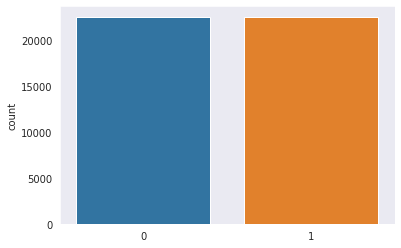

In [85]:
sns.countplot(y_train_rus)

In [86]:
#padronizando dados de treino
scaler= StandardScaler().fit(X_train_rus)
X_train_rus = scaler.transform(X_train_rus)

#Escolhendo Modelo
* XGboost
* RandomForest
* Regressão Logística
* SVC
* Decision Tree Classifier

maximizar a metrica de precision irá reduzir os falsos positivos e aumentar a acurácia.

In [83]:
xgboost_clf = XGBClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
tr_clf = DecisionTreeClassifier()
svc_clf = SVC()

name=[]
precision=[]
for clf in [xgboost_clf, lr_clf, rf_clf, tr_clf, svc_clf]:
  name.append(clf.__class__.__name__)
  precision.append(cross_val_score(clf, X_train_rus, y_train_rus, scoring='precision').mean())
  
pd.DataFrame(data=precision, index=name, columns=['Precision']) 

,Precision
XGBClassifier,0.987408
LogisticRegression,0.669956
RandomForestClassifier,0.993835
DecisionTreeClassifier,0.844510
SVC,0.957421


#Tunning de hiperparâmetros

Tunaremos os melhores classificadores. XGBoost, RandomForest e SVM.

##xgb

In [ ]:
clf = XGBClassifier(learning_rate=0.1)

param_grid= {
    'n_estimators' : range(0,1000,100)
}
grid= GridSearchCV(clf, param_grid=param_grid, scoring='precision', cv=5)
grid_resul=grid.fit(X_train_rus, y_train_rus)

print('precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf= XGBClassifier(learning_rate=0.1, n_estimators= 40 )
param_grid={
    'max_depth': range(3,11)
    }
grid =GridSearchCV(clf, param_grid, scoring='precision', cv=5)

grid_resul= grid.fit(X_train_rus, y_train_rus)

print('precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf= XGBClassifier(learning_rate=0.1, n_estimators= 40, max_depth=3 )
param_grid={
    'subsample': [i/10 for i in range(5, 11)]
    }
grid =GridSearchCV(clf, param_grid, scoring='precision', cv=5)

grid_resul= grid.fit(X_train_rus, y_train_rus)

print('precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf= XGBClassifier(learning_rate=0.1, n_estimators= 40, max_depth=3, subsample= 1)
param_grid={
    'colsample_bytree': [i/10 for i in range(5, 11)]
    }

grid =GridSearchCV(clf, param_grid, scoring='precision', cv=5)

grid_resul= grid.fit(X_train_rus, y_train_rus)

print('precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf= XGBClassifier(learning_rate=0.1, n_estimators= 40, max_depth=3, subsample= 1, colsample_bytree=1)
param_grid={
       'min_child_weight': range(1,5)
    }
    
grid =GridSearchCV(clf, param_grid, scoring='precision', cv=5)

grid_resul= grid.fit(X_train_rus, y_train_rus)

print('precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = XGBClassifier(learning_rate=0.1, n_estimators= 40, max_depth=3, subsample= 1, colsample_bytree=1, min_child_weight=1)
param_grid= {
    'gamma': [i/10 for i in range(0,10)]
}
grid =GridSearchCV(clf, param_grid, scoring='precision', cv=5)

grid_resul= grid.fit(X_train_rus, y_train_rus)

print('precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = XGBClassifier(learning_rate=0.1, n_estimators= 40, max_depth=3, subsample= 1, colsample_bytree=1, min_child_weight=1, gamma=0.1)
param_grid= {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]
}
grid =GridSearchCV(clf, param_grid, scoring='precision', cv=5)

grid_resul= grid.fit(X_train_rus, y_train_rus)

print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

##SVC

In [ ]:
clf = SVC()

param_grid={
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}
grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = SVC(kernel='')

param_grid={
    'gamma' = [0.0001, 0.001, 0.1, 1, 10, 100]
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = SVC(kernel='', gamma=)

param_grid={
    'C' = [0.0001, 0.001, 0.1, 1, 10, 100]
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = SVC(kernel='', gamma=, C=)

param_grid={
    'degree' = [0, 1, 2, 3, 4, 5, 6,7,8,9]
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

##RF

In [ ]:
clf = RandomForestClassifier()

param_grid={
    'n_estimators' = range(10,1000,10)
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = RandomForestClassifier(n_estimators=)

param_grid={
    'min_samples_split': [2, 5, 10]
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = RandomForestClassifier(n_estimators=)

param_grid={
    'min_samples_leaf': [1, 2, 4]
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

In [ ]:
clf = RandomForestClassifier(n_estimators=)

param_grid={
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
}

grid =GridSearch(clf, param_grid, scoring='precision', cv=5)
grid_resul= grid.fit(X_train_rus, y_train_rus)
print('Precision: {}'.format(grid_resul.best_score_ ))
print('best_params: {}'.format(grid_resul.best_params_))

#Ensemble

In [88]:
xgb_clf= XGBClassifier()
rf_clf=RandomForestClassifier()
svc_clf = SVC()

estimators=[('xgb', xgb_clf),('rf',rf_clf),('svc',svc_clf)]

clf= VotingClassifier(estimators, voting='hard')
clf=clf.fit(X_train_rus, y_train_rus)

In [89]:
y_pred= clf.predict(scaler.transform(X_test))

#Resultados

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      7692
           1       0.56      0.03      0.06      1378

    accuracy                           0.85      9070
   macro avg       0.71      0.51      0.49      9070
weighted avg       0.81      0.85      0.79      9070



In [91]:
roc_auc_score(y_test, y_pred)

0.5143507627097537